In [2]:
import csv
import locale
import time
from datetime import datetime

locale.setlocale(locale.LC_ALL, '')
timeFactor = lambda x: round(-0.2369935 + (0.981336 + 0.2369935)/(1 + pow((x/2.542431), 3.1187)), 3)

def yearsFromDate(dateString):
    date = datetime.strptime(dateString, "%m/%d/%Y")
    diff = datetime.utcnow() - date 
    return round(diff.days / 365, 2)

def getNumEmployees(employeesString):
    if '+' in employeesString:
        return employeesString[:employeesString.index('+')]
    return employeesString[employeesString.index('-') + 1:] if '-' in employeesString else "10000"

with open ('new_top_companies.csv', 'r') as file:
    reader = csv.DictReader(file)
    companies = [row for row in reader]
for company in companies:
    status = company['Last Funding Type'] if company['Status'] != 'IPO' else company['Status']
    time_weight = timeFactor(yearsFromDate(company['Last Funding Date'])) if status != 'IPO' else 1
    total_funding = round(locale.atof(company['Total Equity Funding Amount'][1:])/1000000, 2)
    num_employees = int(getNumEmployees(company['Number of Employees']))
    score = round(total_funding * time_weight / num_employees, 3)
    company['Score'] = str(score)
    
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

SpaceX | $1,495,560,000 | 1001-5000 | 0.293
BuzzFeed | $496,300,000 | 501-1000 | 0.464
Uber | $8,812,450,000 | 5001-10000 | 0.858
HubSpot | $100,500,000 | 501-1000 | 0.101
DJI | $105,000,000 |  | 0.004
Symantec | $503,000,000 | 10001+ | 0.05
Redfin | $167,820,000 | 501-1000 | 0.168
GrubHub | $84,100,000 | 501-1000 | 0.084
Flipkart | $7,122,140,000 | 10001+ | 0.699
Yelp | $56,000,000 | 501-1000 | 0.056
WeWork | $9,853,784,331 | 501-1000 | 9.667
Databricks | $247,000,000 | 101-250 | 0.969
ThoughtSpot | $150,700,000 | 101-250 | 0.591
Hyperloop One | $141,100,000 | 101-250 | 0.518
Groupon | $1,387,000,000 | 1001-5000 | 0.277
Impossible Foods | $257,000,000 | 101-250 | 1.008
Lyft | $2,612,500,000 | 1001-5000 | 0.508
Outbrain | $194,000,000 | 501-1000 | 0.156
TuneIn | $103,122,231 | 51-100 | 1.012
Zillow | $96,627,980 | 1001-5000 | 0.019


In [3]:
companies.sort(key=lambda x: float(x['Score']), reverse=True)
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 65.299
Filecoin | $252,120,000 | 1-10 | 24.733
Wish | $1,078,700,000 | 11-50 | 19.999
Jiuxian.com | $249,963,505 | 1-10 | 12.473
Expa | $150,000,000 | 1-10 | 11.505
Ionic Security | $122,440,001 | 1-10 | 10.089
WeWork | $9,853,784,331 | 501-1000 | 9.667
Genalyte | $91,800,000 | 1-10 | 8.583
ARMO BioSciences | $100,000,000 | 1-10 | 7.19
Calient Technologies | $405,118,814 | 11-50 | 7.146
Dailyhunt | $66,643,163 | 1-10 | 6.118
Forty Seven | $75,000,000 | 1-10 | 5.505
Guardant Health | $550,000,000 | 51-100 | 5.373
Mobvoi Inc. | $252,720,178 | 11-50 | 4.913
Kabbage | $488,650,000 | 51-100 | 4.794
AirMap | $43,600,000 | 1-10 | 4.207
Editas Medicine | $210,000,000 | 11-50 | 4.2
Desktop Metal | $211,760,835 | 11-50 | 4.15
Katerra | $205,573,028 | 11-50 | 4.0
eGenesis | $40,000,000 | 1-10 | 3.876


In [4]:
sf_startups = [company for company in companies if 'San Francisco, California, United States' in company['Headquarters Location']]
for company in sf_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.999
Expa | $150,000,000 | 1-10 | 11.505
Digit | $36,300,000 | 1-10 | 3.002
Pinterest | $1,466,100,000 | 251-500 | 2.871
Instabase | $26,970,000 | 1-10 | 2.64
Instacart | $674,800,000 | 101-250 | 2.61
Vicarious | $122,000,000 | 11-50 | 2.394
Invuity | $106,999,999 | 11-50 | 2.14
Airware | $109,550,000 | 11-50 | 2.103
Mavrx | $22,420,781 | 1-10 | 2.029
Amitree | $19,828,000 | 1-10 | 1.945
Autonomic Technologies | $136,200,000 | 11-50 | 1.841
SoFi | $1,878,226,991 | 501-1000 | 1.812
Discord | $79,300,000 | 11-50 | 1.553
Five Prime Therapeutics | $155,040,487 | 51-100 | 1.55
Affirm | $420,000,000 | 101-250 | 1.541
Freenome | $77,550,000 | 11-50 | 1.522
Netlify | $14,100,000 | 1-10 | 1.383
Houseparty | $73,200,000 | 11-50 | 1.381
Anki | $157,500,000 | 51-100 | 1.334


In [5]:
fintech_startups = [company for company in companies if 'FinTech' in company['Categories']]
for company in fintech_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Kabbage | $488,650,000 | 51-100 | 4.794
PPDai | $70,200,000 | 1-10 | 2.618
Cadre | $133,300,000 | 11-50 | 2.61
BlueVine | $113,000,000 | 11-50 | 2.183
Samlino.dk | $20,463,040 | 1-10 | 1.823
SoFi | $1,878,226,991 | 501-1000 | 1.812
Blockstream | $126,000,000 | 11-50 | 1.792
Robinhood | $176,000,000 | 51-100 | 1.716
Affirm | $420,000,000 | 101-250 | 1.541
Behalf | $156,000,000 | 51-100 | 1.39
Blockchain | $70,000,000 | 11-50 | 1.371
Hyper Anna | $13,644,766 | 1-10 | 1.338
Circle | $136,000,000 | 51-100 | 1.145
Trumid Financial | $54,250,000 | 11-50 | 1.063
Quantopian | $48,800,000 | 11-50 | 0.91
PLASTIQ | $45,349,996 | 11-50 | 0.89
Capital Float | $88,530,456 | 51-100 | 0.868
Veem | $44,250,000 | 11-50 | 0.856
Coinbase | $217,209,590 | 101-250 | 0.852
Upstart | $85,650,000 | 51-100 | 0.828


In [6]:
non_biotech_companies = [company for company in companies if 'Biotechnology' not in company['Categories']]
for company in non_biotech_companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 65.299
Filecoin | $252,120,000 | 1-10 | 24.733
Wish | $1,078,700,000 | 11-50 | 19.999
Jiuxian.com | $249,963,505 | 1-10 | 12.473
Expa | $150,000,000 | 1-10 | 11.505
Ionic Security | $122,440,001 | 1-10 | 10.089
WeWork | $9,853,784,331 | 501-1000 | 9.667
Calient Technologies | $405,118,814 | 11-50 | 7.146
Dailyhunt | $66,643,163 | 1-10 | 6.118
Mobvoi Inc. | $252,720,178 | 11-50 | 4.913
Kabbage | $488,650,000 | 51-100 | 4.794
AirMap | $43,600,000 | 1-10 | 4.207
Desktop Metal | $211,760,835 | 11-50 | 4.15
Katerra | $205,573,028 | 11-50 | 4.0
Go-Jek | $1,750,000,000 | 251-500 | 3.416
Nauto, Inc. | $173,850,000 | 11-50 | 3.411
cheddar | $32,000,000 | 1-10 | 3.126
Digit | $36,300,000 | 1-10 | 3.002
Pinterest | $1,466,100,000 | 251-500 | 2.871
Tokopedia | $1,347,700,000 | 251-500 | 2.644


In [7]:
mobile_startups = [company for company in companies if 'Mobile' in company['Category Groups'] and 'United States' in company['Headquarters Location']]
for company in mobile_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.999
Expa | $150,000,000 | 1-10 | 11.505
Nauto, Inc. | $173,850,000 | 11-50 | 3.411
Joya Communications | $25,000,000 | 1-10 | 2.335
ooma | $95,432,819 | 11-50 | 1.909
Skydio | $28,000,000 | 1-10 | 1.904
Robinhood | $176,000,000 | 51-100 | 1.716
Discord | $79,300,000 | 11-50 | 1.553
Houseparty | $73,200,000 | 11-50 | 1.381
Onshape | $169,000,000 | 51-100 | 1.32
Branch | $113,050,000 | 51-100 | 1.1
AISense Inc. | $11,200,000 | 1-10 | 1.092
TuneIn | $103,122,231 | 51-100 | 1.012
Zeel | $13,200,000 | 1-10 | 1.007
Getaround | $101,299,999 | 51-100 | 0.987
Zugata | $10,200,000 | 1-10 | 0.951
Amino | $45,000,000 | 11-50 | 0.875
Diffbot | $12,000,000 | 1-10 | 0.863
Uber | $8,812,450,000 | 5001-10000 | 0.858
Tala (formerly InVenture) | $44,439,706 | 11-50 | 0.857


In [8]:
data_startups = [company for company in companies if 'Data and Analytics' in company['Category Groups']]
for company in data_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.999
Mobvoi Inc. | $252,720,178 | 11-50 | 4.913
AirMap | $43,600,000 | 1-10 | 4.207
Instabase | $26,970,000 | 1-10 | 2.64
Vicarious | $122,000,000 | 11-50 | 2.394
Mavrx | $22,420,781 | 1-10 | 2.029
Farmers Business Network | $83,900,000 | 11-50 | 1.623
Orbital Insight, Inc. | $78,700,000 | 11-50 | 1.535
Color Genomics | $150,548,112 | 51-100 | 1.477
Hyper Anna | $13,644,766 | 1-10 | 1.338
Anki | $157,500,000 | 51-100 | 1.334
Lemonade | $60,000,000 | 11-50 | 1.17
Versive | $57,000,000 | 11-50 | 1.118
Branch | $113,050,000 | 51-100 | 1.1
Cockroach Labs | $53,500,000 | 11-50 | 1.044
Elastifile | $58,000,000 | 11-50 | 0.97
Databricks | $247,000,000 | 101-250 | 0.969
Solarflare Communications | $251,971,379 | 101-250 | 0.945
Sumo Logic | $230,000,000 | 101-250 | 0.902
Bitly | $91,500,000 | 51-100 | 0.897


In [9]:
nyc_startups = [company for company in companies if 'New York' in company['Headquarters Location']]
for company in nyc_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

WeWork | $9,853,784,331 | 501-1000 | 9.667
cheddar | $32,000,000 | 1-10 | 3.126
Cadre | $133,300,000 | 11-50 | 2.61
Casper | $239,700,000 | 51-100 | 2.347
Common | $23,350,000 | 1-10 | 1.952
Spring Inc | $97,500,000 | 11-50 | 1.905
Peloton | $444,707,000 | 101-250 | 1.74
Blink Health | $165,000,000 | 51-100 | 1.605
letgo | $375,000,000 | 101-250 | 1.433
Giphy | $150,949,998 | 51-100 | 1.398
Behalf | $156,000,000 | 51-100 | 1.39
Beeswax | $13,300,000 | 1-10 | 1.194
Lemonade | $60,000,000 | 11-50 | 1.17
MakeSpace | $57,600,000 | 11-50 | 1.122
Trumid Financial | $54,250,000 | 11-50 | 1.063
Oscar | $727,500,000 | 251-500 | 1.062
Cockroach Labs | $53,500,000 | 11-50 | 1.044
Ellevest | $51,458,913 | 11-50 | 1.01
Zeel | $13,200,000 | 1-10 | 1.007
The Farmer's Dog | $10,100,000 | 1-10 | 0.987


In [10]:
import pandas as pd

data = pd.read_csv('company_talent.csv', index_col = False)
data.columns = ['company_name', 'num_employees', 'past_companies', 'past_schools']

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [11]:
data.dropna(how='any')
data.drop_duplicates(subset=['company_name']).head(10)

,company_name,num_employees,past_companies,past_schools
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade Inc,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [12]:
past_schools_column = []
school_prefixes = ['University of California', 'California State University', 'Indian Institute of Technology']
for index, school_string in enumerate(data.past_schools):
    if not isinstance(school_string, str):
        data.drop(index, inplace=True)
        continue
    schools = school_string.split(',') 
    for k, v in enumerate(schools):
        v = v.strip()
        if any(school_prefix == v for school_prefix in school_prefixes):
            if k + 1 < len(schools):
                schools[k] += schools[k+1]
                schools[k].strip()
                del(schools[k+1])
        if v == 'Haas School of Business':
            schools[k - 1] += schools[k]
            del(schools[k])
    past_schools_column.append(','.join(schools))
data.past_schools = past_schools_column

In [13]:
stanford_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_startups.tail(5)

,company_name,num_employees,past_companies,past_schools
1660,21.co,26,"Counsyl, OpenGov Inc., 21.co, Merrill Lynch, H...","Stanford University, Massachusetts Institute o..."
1672,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1681,DivvyHomes,5,"DoubleDutch, SpaceX, Square, Microsoft, Merril...","Stanford University, Cornell University, Calif..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1687,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ..."


In [14]:
stanford_startups = stanford_startups[(stanford_startups.num_employees > 10) & (stanford_startups.num_employees < 300)]
stanford_startups.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
805,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt..."
222,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ..."
166,Change.org,217,"Change.org, Zynga, Greenpeace, Cisco, Plan Int...","Stanford University, University of California ..."
424,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu..."
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University..."
452,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ..."
640,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California ..."


In [15]:
stanford_startups.sort_values('num_employees').head(15)

,company_name,num_employees,past_companies,past_schools
994,Gixo,14,"SurveyMonkey, TRX Training, Wilkes Barre Power...","Stanford University, Brigham Young University,..."
787,Joya Communications,14,"Microsoft, Clarion University of Pennsylvania,...",Stanford University Graduate School of Busines...
1241,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...
868,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ..."
1207,Sherpaa,15,"GE Healthcare, Personal, Hello Health Inc., Lo...","Stanford University, The Johns Hopkins Univers..."
1656,Shogun Enterprises,15,"Northwestern University, Stanford University, ...","Stanford University, Northwestern University, ..."
1204,Invicta Medical,16,"BlackBerry, Medconx, Inc., Singularity Univers...","Stanford University, University of Southern Ca..."
811,AISense Inc.,16,"Yahoo! Inc., Knowles Intelligent Audio, Google...","Stanford University, Nankai University, Peking..."
772,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
429,LiftIgniter,17,"Act-On Software, Inc., Seagate Technology, Web...","Stanford University, Princeton University, The..."


In [16]:
former_palantir = data[data.past_companies.str.contains('Palantir Technologies', na=False)]
former_palantir

,company_name,num_employees,past_companies,past_schools
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
406,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit..."
670,Handshake,82,"Michigan Technological University, Google, Pal...","Michigan Technological University, Stanford Un..."
924,Alluxio,23,"Microsoft, Google, Palantir Technologies, Broc...","Carnegie Mellon University, Tsinghua Universit..."
1264,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive..."
1452,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa..."
1648,Socotra,45,"Palantir Technologies, Carnegie Mellon Univers...","University of California Berkeley, Stanford Un..."


In [17]:
ex_bridgewater = data[data.past_companies.str.contains('Bridgewater', na=False)]
ex_bridgewater

,company_name,num_employees,past_companies,past_schools
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
368,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers..."
877,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
975,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U..."
1007,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi..."
1488,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit..."
1515,MediaSpike,9,"Wolfram, HMC Electronics, A Division of Hisco,...","Lodz University of Technology, University of I..."
1649,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka..."
1685,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo..."


In [18]:
ex_goldman = data[data.past_companies.str.contains('Goldman Sachs', na=False)]
ex_goldman = ex_goldman[ex_goldman.num_employees > 10]
ex_goldman.sort_values('num_employees')

,company_name,num_employees,past_companies,past_schools
1679,Chain,27,"Goldman Sachs, Microsoft, Wakefield Council, A...","Carnegie Mellon University, Stanford Universit..."
1373,SevenFifty,30,"SevenFifty, Goldman Sachs, Penguin Random Hous...","University of Pennsylvania, New York Universit..."
193,Ellevest,38,"Goldman Sachs, NYC Department of Parks & Recre...","University of Pennsylvania, Harvard University..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
645,Bond Street,40,"Citi, JPMorgan Chase & Co., Deutsche Bank, Gol...","New York University, General Assembly, Harvard..."
1570,Patients Know Best,43,"Patients Know Best, Orion Health, The Janssen ...","University of Cambridge, Trinity College Dubli..."
1341,Jopwell,48,"Goldman Sachs, Morehouse College, Barnard Coll...","Morehouse College, Duke University, Princeton ..."
892,Shift Technology,67,"IBM, BearingPoint, vente-privee, Orange, Goldm...","École Polytechnique, MINES ParisTech, Universi..."
1683,Stash,82,"Stash Invest, Goldman Sachs, Voya Financial, M...","General Assembly, New York University, Brown U..."


In [19]:
ex_clarium = data[data.past_companies.str.contains('Clarium Capital', na=False)]
ex_clarium

,company_name,num_employees,past_companies,past_schools
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
1062,Chatous,6,"Clarium Capital Management, Hanover College, I...","University of Toronto, University of Waterloo,..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1608,Kalo,75,"Zenefits, Kalo, Cisco, Deutsche Bank, Clarium ...","University of Warwick, Boston University, Univ..."


In [20]:
ex_google = data[data.past_companies.str.contains('Google', na=False)]
ex_google.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
379,Square,2258,"Square, Apple, Google, Microsoft, Visa","University of California Berkeley, Stanford Un..."
43,Atlassian,2348,"Atlassian, IBM, Microsoft, Google, Macquarie G...","UNSW, University of Sydney, University of Tech..."
238,Etsy,2709,"Etsy, Google, PwC, Yahoo! Inc., Apple","New York University, Fashion Institute of Tech..."
598,Spotify,3587,"Spotify, Ericsson, Microsoft, Google, Yahoo! Inc.","KTH Royal Institute of Technology, Stockholm U..."
29,Twitter,3742,"Twitter, Google, Microsoft, Yahoo! Inc., Apple","University of California Berkeley, Stanford Un..."
67,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un..."
25,Lyft,8321,"Lyft, Google, US Army, US Navy, Walmart","University of Phoenix, University of Californi..."
44,Facebook,22258,"Facebook, Microsoft, Google, Yahoo! Inc., Amazon","Stanford University, University of California ..."
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un..."
113,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ..."


In [21]:
prime_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0] and 'Berkeley' in x.split(',')[1])]
prime_startups.sort_values('num_employees')

,company_name,num_employees,past_companies,past_schools
772,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
904,Halo Neuroscience,26,"McKinsey & Company, Hamilton College, The Bost...","Stanford University, University of California ..."
756,Momentum Machines,28,"Stanford University, Tesla, Momentum Machines ...","Stanford University, University of California ..."
949,Brightwheel,32,"Amazon, LinkedIn, Indiegogo, NerdWallet, Soldsie","Stanford University, University of California ..."
1672,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1478,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ..."
1346,Vigilent,49,"Vigilent, Marine Corps Recruiting, Lockheed Ma...","Stanford University, University of California ..."
534,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."


In [22]:
past_schools = []
for school in [company for company in data.past_schools]:
    past_schools.extend([s.strip() for s in school.split(',')])

In [23]:
len(set(past_schools))

1802

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

schools_counter = Counter(past_schools)
common_schools = [school for school, count in schools_counter.most_common(25)]
common_schools_count = [count for school, count in schools_counter.most_common(25)]

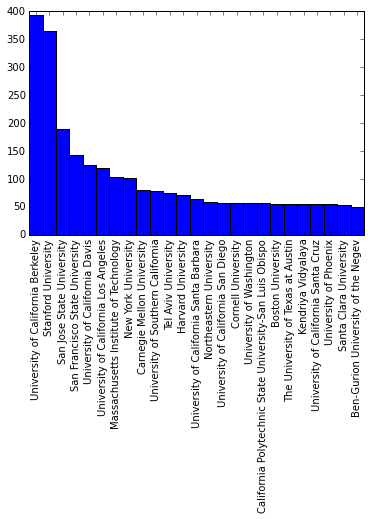

In [25]:
indexes = np.arange(len(common_schools))
width = 1

plt.bar(indexes, common_schools_count, width)
plt.xticks(indexes + width * 0.5, common_schools)
plt.xticks(rotation=90)
plt.show()

In [26]:
past_companies_column = []
company_postfixes = ['Inc.']
for index, company_string in data.past_companies.items():
    if not isinstance(company_string, str):
        data.drop(index, inplace=True)
        continue
    companies = company_string.split(',')
    for k, v in enumerate(companies):
        if any(company_postfix == v.strip() for company_postfix in company_postfixes):
            companies[k - 1] += companies[k]
            del(companies[k])
    past_companies_column.append(','.join(companies))
data.past_companies = past_companies_column

In [27]:
past_companies = []
for company in [company for company in data.past_companies]:
    past_companies.extend([s.strip() for s in company.split(',')])

In [28]:
company_counter = Counter(past_companies)
common_companies = [company for company, count in company_counter.most_common(25)]
common_companies_count = [count for company, count in company_counter.most_common(25)]
company_counter.most_common(40)

[('Microsoft', 230),
 ('IBM', 181),
 ('Google', 175),
 ('Oracle', 131),
 ('Hewlett Packard Enterprise', 114),
 ('Cisco', 113),
 ('Apple', 91),
 ('Yahoo! Inc.', 81),
 ('University of California', 64),
 ('Stanford University', 62),
 ('Amazon', 50),
 ('Intel Corporation', 48),
 ('Israel Defense Forces', 44),
 ('Nokia', 41),
 ('Symantec', 40),
 ('Salesforce', 38),
 ('Facebook', 37),
 ('eBay', 35),
 ('VMware', 34),
 ('LinkedIn', 32),
 ('Dell', 29),
 ('Sun Microsystems', 29),
 ('Dell EMC', 27),
 ('Accenture', 27),
 ('Citi', 26),
 ('Goldman Sachs', 25),
 ('Electronic Arts (EA)', 24),
 ('Berkeley', 23),
 ('Target', 22),
 ('American Express', 22),
 ('Adobe', 21),
 ('Massachusetts Institute of Technology', 21),
 ('AT&T', 20),
 ('Groupon', 20),
 ('NetApp', 20),
 ('Inc', 19),
 ('Flipkart', 19),
 ('US Army', 19),
 ('Morgan Stanley', 18),
 ('SAP', 18)]

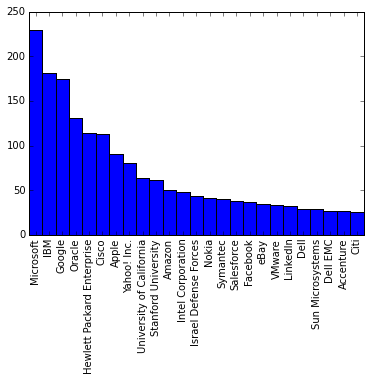

In [29]:
indexes = np.arange(len(common_companies))
width = 1

plt.bar(indexes, common_companies_count, width)
plt.xticks(indexes + width * 0.5, common_companies)
plt.xticks(rotation=90)
plt.show()

In [30]:
startups = pd.read_csv('new_top_companies.csv', index_col = False)
startups.columns = ["company_name", "company_name_url", "category_groups", "headquarters_location", "description", 
                    "crunchbase_rank", "website", "last_funding_type", "last_funding_amount", "total_funding_amount", 
                    "trend_score", "employees_estimate", "categories", "founded_date", "status", "last_funding_date", 
                    "total_equity_funding_amount", "valuation_at_ipo"]
startups.head(1)

,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN


In [31]:
data = pd.merge(data, startups, on = 'company_name', how='inner')
data.drop('employees_estimate', axis=1, inplace=True)
data = data.drop_duplicates(subset=['company_name'], keep='last')
data = data[pd.notnull(data['last_funding_amount'])]
data = data[pd.notnull(data['total_funding_amount'])]
data = data[data['last_funding_amount'].str.startswith('$')]
data = data[data['total_funding_amount'].str.startswith('$')]
data.shape

(1444, 20)

In [32]:
data['time_since_last_funding'] = data['last_funding_date'].apply(lambda x: yearsFromDate(str(x)))
data.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$100,000,000","$520,000,000",-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,"$420,000,000",NaN,1.01
2,Flexport,464,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,"$110,000,000","$204,000,000",-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,"$204,000,000",NaN,0.07
3,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/qadium...,"Information Technology, Software, Privacy and ...","San Francisco, California, United States",Qadium creates and organizes knowledge about t...,4492,https://qadium.com/,...,"$40,000,000","$65,970,000",-0.7,"Software, Security, Information Technology, Cy...",05/01/2012,Operating,8/30/2017,"$65,970,000",NaN,0.13
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000","$160,000,000",8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,"$160,000,000",NaN,0.15
8,Cadre,87,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University...",https://www.crunchbase.com/organization/cadre-2,"Commerce and Shopping, Real Estate, Financial ...","New York, New York, United States",Cadre is an online marketplace that connects i...,1235,http://cadre.com,...,"$65,000,000","$133,300,000",-2.9,"FinTech, Financial Services, Real Estate, Mark...",09/11/2014,Operating,06/06/2017,"$133,300,000",NaN,0.36


In [33]:
data.sort_values('crunchbase_rank').head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
11,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl...",https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,...,"$350,000,000","$1,495,560,000",0.8,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN,0.22
12,BuzzFeed,2020,"BuzzFeed, NBCUniversal Media, LLC, Viacom, Yah...","New York University, Syracuse University, Univ...",https://www.crunchbase.com/organization/buzzfeed,"Media and Entertainment, Internet Services, Vi...","New York, New York, United States","BuzzFeed provides shareable breaking news, ori...",11,http://www.buzzfeed.com,...,"$200,000,000","$496,300,000",-0.1,"Internet, News, Video, Digital Entertainment, ...",01/01/2006,Operating,11/18/2016,"$496,300,000",NaN,0.91
14,HubSpot,2275,"HubSpot, Oracle, Apple, IBM, LinkedIn","Northeastern University, Boston University, Bo...",https://www.crunchbase.com/organization/hubspot,"Media and Entertainment, Information Technolog...","Cambridge, Massachusetts, United States","HubSpot develops cloud-based, inbound marketin...",14,http://www.hubspot.com,...,"$35,000,000","$100,500,000",5.6,"Analytics, Information Technology, Social Medi...",06/09/2006,IPO,11/10/2012,"$100,500,000","$759,000,000",4.93
15,DJI,816,"DJI, Sony, Samsung Electronics, Microsoft, Cro...",The Hong Kong University of Science and Techno...,https://www.crunchbase.com/organization/dji,"Manufacturing, Science and Engineering, Hardwa...","Shenzhen, Guangdong, China",DJI Innovations is a Chinese company that prod...,20,http://www.dji.com/,...,"$75,000,000","$105,000,000",3.2,"Manufacturing, Wireless, Consumer Electronics,...",11/06/2006,Operating,05/05/2015,"$105,000,000",NaN,2.45
16,Symantec,20700,"Symantec, Hewlett Packard Enterprise, IBM, Cis...","University of Pune, San Jose State University,...",https://www.crunchbase.com/organization/symantec,"Hardware, Information Technology, Consumer Ele...","Mountain View, California, United States","Symantec provides security, storage, and syste...",24,http://www.nortontechnicalsupportnumber.com/,...,"$500,000,000","$503,000,000",-0.6,"Security, Cyber Security, Computer",01/01/1982,IPO,02/04/2016,"$503,000,000",NaN,1.70


In [34]:
data['total_equity_funding_amount'] = data['total_equity_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data['last_funding_amount'] = data['last_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data['total_funding_amount'] = data['total_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,100000000,520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,420000000,NaN,1.01
2,Flexport,464,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,110000000,204000000,-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,204000000,NaN,0.07
3,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/qadium...,"Information Technology, Software, Privacy and ...","San Francisco, California, United States",Qadium creates and organizes knowledge about t...,4492,https://qadium.com/,...,40000000,65970000,-0.7,"Software, Security, Information Technology, Cy...",05/01/2012,Operating,8/30/2017,65970000,NaN,0.13
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,100000000,160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.15
8,Cadre,87,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University...",https://www.crunchbase.com/organization/cadre-2,"Commerce and Shopping, Real Estate, Financial ...","New York, New York, United States",Cadre is an online marketplace that connects i...,1235,http://cadre.com,...,65000000,133300000,-2.9,"FinTech, Financial Services, Real Estate, Mark...",09/11/2014,Operating,06/06/2017,133300000,NaN,0.36


In [35]:
finance_fields = ['Finance', 'Financial Services', 'FinTech']
fintech_startups = data[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('crunchbase_rank').head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
33,Coinbase,183,"Coinbase, Bain & Company, Google, Guidewire So...","University of California Berkeley, Duke Univer...",https://www.crunchbase.com/organization/coinbase,"Commerce and Shopping, Software, Payments, Fin...","San Francisco, California, United States",Coinbase is a digital currency wallet service ...,58,https://www.coinbase.com,...,100000000,217209590,-2.4,"E-Commerce, Personal Finance, FinTech, Cryptoc...",06/01/2012,Operating,08/10/2017,217209590,NaN,0.18
38,Klarna,1270,"Klarna, Ericsson, American Express, SEB, Nordn...","Stockholm University, KTH Royal Institute of T...",https://www.crunchbase.com/organization/klarna,"Commerce and Shopping, Payments, Financial Ser...","Stockholm, Stockholms Lan, Sweden",Klarna provides e-commerce payment solutions f...,80,http://www.klarna.com,...,225000000,636846585,-2.1,"Payments, FinTech, Financial Services, E-Commerce",02/01/2005,Operating,07/21/2017,601443112,NaN,0.24
47,MuleSoft,1183,"MuleSoft, Oracle, IBM, TIBCO Software Inc., BE...","University of Buenos Aires, Universidad Tecnol...",https://www.crunchbase.com/organization/mulesoft,"Apps, Software, Financial Services","San Francisco, California, United States",MuleSoft is a provider of the leading platform...,111,http://www.mulesoft.com,...,128000000,259000000,-0.4,"Apps, Developer APIs, Enterprise Software, Fin...",01/01/2006,IPO,05/19/2015,259000000,"$2,900,000,000",2.41
49,Workday,8531,"Workday, Oracle, SAP, ADP, IBM","University of California Berkeley, California ...",https://www.crunchbase.com/organization/workday,"Software, Financial Services","Pleasanton, California, United States",Workday provides SaaS-based enterprise solutio...,113,http://www.workday.com,...,85000000,230550000,-0.9,"Human Resources, Finance, FinTech, Web Develop...",03/01/2005,IPO,10/24/2011,230550000,"$4,500,000,000",5.98
52,Funding Circle,225,"Funding Circle US, LendingClub, Funding Circle...","University of California Berkeley, San Francis...",https://www.crunchbase.com/organization/fundin...,Financial Services,"London, England, United Kingdom",Funding Circle is a lending platform focused e...,122,http://www.fundingcircle.com,...,100000000,413237070,-2.2,"FinTech, Personal Finance, Financial Services,...",08/13/2010,Operating,01/11/2017,373237070,NaN,0.76


In [36]:
stanford_fintech = fintech_startups[fintech_startups.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_fintech.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,100000000,520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,420000000,NaN,1.01
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,100000000,160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.15
74,Wealthfront,164,"Wealthfront Inc., Stanford University, Goldman...","Stanford University, University of California ...",https://www.crunchbase.com/organization/wealth...,"Financial Services, Lending and Investments","Redwood City, California, United States",Wealthfront is the largest and fastest growing...,210,http://wealthfront.com,...,64000000,129500000,-1.3,"FinTech, Financial Services, Stock Exchanges, ...",01/01/2008,Operating,10/27/2014,129500000,NaN,2.97
130,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,2100000,26200000,-5.6,"Recruiting, Finance",01/01/2010,Operating,03/09/2015,26200000,NaN,2.61
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,140000000,205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.36


In [37]:
stanford_seriesA = data[data.last_funding_type == 'Series A']
stanford_seriesA = stanford_seriesA[stanford_seriesA.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_seriesA.shape

(29, 21)

In [38]:
stanford_seriesA.sort_values('crunchbase_rank').head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
73,AltspaceVR,38,"Microsoft, Maastricht University, Adobe, Green...","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/qualia3d,"Hardware, Media and Entertainment, Information...","Redwood City, California, United States",AltspaceVR is a virtual reality software company.,206,http://altvr.com/,...,10300000,15700000,8.2,"Virtualization, Virtual Reality, Digital Media",01/01/2013,Operating,07/29/2015,15700000,NaN,2.22
143,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,7000000,77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.13
315,Homebase,502,"Home Retail Group PLC, B&Q, Woolworths, eBay, ...",Stanford University Graduate School of Busines...,https://www.crunchbase.com/organization/homebase,NaN,"San Francisco, California, United States",Homebase is the easiest way to track hours and...,1145,http://www.joinhomebase.com,...,6000000,8000000,1.8,"Local, Human Resources, Small and Medium Busin...",01/01/2014,Operating,08/04/2016,8000000,NaN,1.20
335,FILLD,19,"eBay, Sega of America Inc., Apple, Geoworks, G...","Stanford University, Bethany College, Santa Cl...",https://www.crunchbase.com/organization/filld,"Apps, Natural Resources, Energy, Software","Mountain View, California, United States",Filld is an app-based service that delivers ga...,1254,http://www.filld.com,...,9650000,12900000,8.0,"Apps, Oil and Gas, Service Industry",01/01/2015,Operating,08/15/2017,12900000,NaN,0.17
387,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...",https://www.crunchbase.com/organization/unifyid,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",UnifyID is an identity platform that offers se...,1523,https://unify.id,...,20000000,20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,Operating,08/01/2017,20000000,NaN,0.21
433,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...",https://www.crunchbase.com/organization/liftig...,"Science and Engineering, Information Technolog...","San Francisco, California, United States",LiftIgniter is a machine learning personalizat...,1689,http://www.liftigniter.com/,...,6400000,6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,Operating,08/17/2017,6450000,NaN,0.16
507,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...",https://www.crunchbase.com/organization/stackrox,"Software, Internet Services, Privacy and Security","Mountain View, California, United States",StackRox delivers the industry's only adaptive...,2060,http://www.stackrox.com,...,14000000,14000000,9.0,"Security, Enterprise Software, Cloud Computing",11/01/2014,Operating,07/18/2017,14000000,NaN,0.25
678,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/safegraph,"Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",SafeGraph is unlocking the world's most powerf...,2908,http://www.safegraph.com/,...,16000000,16000000,-1.3,"Artificial Intelligence, Machine Learning, Q&A...",01/01/2016,Operating,04/19/2017,16000000,NaN,0.4

In [39]:
stanford_seriesA.sort_values('total_funding_amount', ascending=False).head(15)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
143,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,7000000,77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.13
941,Forty Seven,34,"Gilead Sciences, Stanford University School of...","Stanford University School of Medicine, Stanfo...",https://www.crunchbase.com/organization/forty-...,"Biotechnology, Science and Engineering, Health...","Palo Alto, California, United States",Calif.-based clinical-stage immuno-oncology co...,4764,http://www.fortyseveninc.com,...,75000000,75000000,4.2,"Clinical Trials, Health Care, Biotechnology",01/01/2015,Operating,02/25/2016,75000000,NaN,1.64
1464,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ...",https://www.crunchbase.com/organization/karius,Information Technology,"Redwood City, California, United States",Karius is focused on conquering infectious dis...,14152,http://www.kariusdx.com,...,50000000,55000000,NaN,Information Technology,01/01/2014,Operating,08/05/2017,55000000,NaN,0.20
1621,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,25000000,30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,Operating,05/17/2017,30500000,NaN,0.42
1265,Vium,46,"BTS Research, Covance, Adecco, Wellesley Colle...","Stanford University, University of California ...",https://www.crunchbase.com/organization/mousera,"Biotechnology, Science and Engineering, Health...","San Mateo, California, United States","Vium, Inc. develops medical technology. The co...",8351,http://www.vium.com,...,20000004,29940004,-0.4,"Life Science, Biotechnology, Medical Device",01/01/2013,Operating,06/09/2015,29940004,NaN,2.36
691,Tachyus,28,"Schlumberger, Halliburton, Baker Hughes, a GE ...","Stanford University, NYU Stern School of Busin...",https://www.crunchbase.com/organization/tachyus,"Natural Resources, Energy, Information Technol...","San Mateo, California, United States",Tachyus allows operators to optimize energy pr...,3008,http://www.tachyus.com,...,4000000,24328000,-0.3,"Analytics, Enterprise Software, Data Visualiza...",01/01/2013,Operating,03/01/2016,23800000,NaN,1.63
913,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,19300000,24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,Operating,08/17/2016,24300000,NaN,1.16
387,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...",https://www.crunchbase.com/organization/unifyid,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",UnifyID is an identity platform that offers se...,1523,https://unify.id,...,20000000,20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,Operating,08/01/2017,20000000,NaN,0.21
869,Ascen

In [40]:
data = data[data.past_schools.map(lambda x: len(x.split(',')) > 1)]
data.shape

(1431, 21)

In [41]:
top_schools = ['Stanford University', 'University of California Berkeley', 'Massachusetts Institute of Technology']
vc_rounds = ['Series B', 'Series C', 'Series D']
strong_startups = data[data.past_schools.map(lambda x: x.split(',')[0] in top_schools and x.split(',')[1].strip() in top_schools)]
strong_startups = strong_startups[strong_startups.last_funding_type.map(lambda x: x in vc_rounds)]
strong_startups = strong_startups[strong_startups.num_employees < 350]
strong_startups.sort_values('total_funding_amount', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
22,Databricks,223,"Microsoft, Google, Databricks, IBM, Axway","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/databr...,"Data and Analytics, Software","San Francisco, California, United States",Databricks accelerates innovation by unifying ...,35,https://databricks.com,...,140000000,247000000,8.5,"Analytics, Enterprise Software, Open Source",01/01/2013,Operating,08/22/2017,247000000,NaN,0.15
146,Nextdoor,271,"Twitter, Nextdoor, Google, Yelp, eBay Advertising","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/nextdoor,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Nextdoor is a private social network that enab...,490,http://nextdoor.com,...,110000000,210200000,-3.3,"Social Media, Private Social Networking, GovTe...",01/01/2010,Operating,03/03/2015,210200000,NaN,2.62
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,140000000,205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.36
1283,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,110000000,176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,Operating,04/26/2017,176000000,NaN,0.47
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,100000000,160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.15
48,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...",https://www.crunchbase.com/organization/color-...,"Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",Color Genomics provides a service that helps p...,112,https://www.color.com,...,52000000,150548112,8.6,"Machine Learning, Product Design, Biotechnolog...",01/01/2013,Operating,08/16/2017,150548112,NaN,0.17
376,Livongo,157,"Allscripts, Livongo, Shutterfly Inc., GE Healt...","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/livong...,"Information Technology, Health Care","Mountain View, California, United States",Livongo is empowering people with chronic cond...,1490,http://www.livongo.com/,...,52500000,143200001,-0.6,"Health Diagnostics, Information Technology, He...",01/01/2014,Operating,03/16/2017,143200001,NaN,0.59
227,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ...",https://www.crunchbase.com/organization/instar...,"Media and Entertainment, Information Technolog...","Palo Alto, California, United States",Instart Logic is the world's first endpoint-aw...,804,http://www.instartlogic.com,...,45000000,140000000,3.9,"Digital Media, Software, Content Delivery Netw...",11/01/2010,Operating,01/20/2016,140000000,NaN,1.74
74,Wealthfront,164,"Wealthfront Inc., Stan

In [42]:
plotdata = data
plotdata.drop(['company_name_url', 'website', 'description', 'valuation_at_ipo'], axis=1, inplace=True)
plotdata = plotdata.loc[plotdata['status'] == 'Operating']
plotdata.drop('status', axis=1, inplace=True)
plotdata.tail()

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding
1633,Chain,27,"Goldman Sachs, Microsoft, Wakefield Council, A...","Carnegie Mellon University, Stanford Universit...","Community and Lifestyle, Professional Services...","San Francisco, California, United States",2161,Series C,30000000,43700000,-1.0,"FinTech, Enterprise, Professional Networking",01/01/2014,09/09/2015,43700000,2.10
1634,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo...","Information Technology, Health Care, Financial...","New York, New York, United States",15388,Private Equity,400000000,727500000,-6.2,"Insurance, Information Technology, Health Care",07/01/2013,02/22/2016,727500000,1.65
1635,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...","Hardware, Information Technology, Software, In...","Palo Alto, California, United States",10765,Series D,180000000,292000000,-2.5,"Data Center Automation, Cloud Management, Secu...",01/01/2014,04/28/2017,292000000,0.47
1636,Wish,334,"Wish, Google, Facebook, LinkedIn, University o...","University of Waterloo, University of Californ...","Hardware, Commerce and Shopping, Media and Ent...","San Francisco, California, United States",26344,Series F,500000000,1078700000,-2.9,"Content Discovery, Software, Computer, E-Comme...",01/01/2010,11/04/2016,1078700000,0.95
1639,Radius,182,"Radius Intelligence, Salesforce, Oracle, Linke...","University of California Berkeley, San Jose St...","Data and Analytics, Software, Sales and Market...","San Francisco, California, United States",1488,Series D,28700000,107550000,-0.8,"Predictive Analytics, Marketing Automation, Bu...",10/01/2008,07/29/2015,107550000,2.22


In [43]:
plotdata.shape

(1349, 16)

In [44]:
def score_schools(startup):
    school_scorer = {'Stanford University': 0.9, 'Stanford University Graduate School of Business': 0.9, 'University of California Berkeley': 0.75, 
                     'Massachussetts Institute of Technology': 0.7, 'Carnegie Mellon University': 0.65, 'Caltech': 0.65, 
                     'Harvard University': 0.7, 'Cornell University': 0.6, 'Columbia University in the City of New York': 0.65,
                     'University of Illinois at Urbana-Champaign': 0.55, 'The University of Texas at Austin': 0.5,
                     'Georgia Institute of Technology': 0.5, 'University of Michigan': 0.5, 'Yale University': 0.6, 
                     'Oxford University': 0.6, 'Duke University': 0.5, 'University of Southern California': 0.5, 
                     'University of Waterloo': 0.65, 'University of Pennsylvania': 0.6}
    past_schools = startup['past_schools'].split(',')
    score = 0
    for school in past_schools:
        index_wt = 6 - past_schools.index(school)
        if school in school_scorer:
            score += school_scorer[school] * index_wt
        else:
            score += 0.3 * index_wt
    score = score / len(past_schools)
    return score
def score_company(startup):
    funding_ratio = startup.funding_ratio / plotdata['funding_ratio'].max()
    time_since_funding_score = timeFactor(startup['time_since_last_funding'])
    school_score = score_schools(startup) 
    num_employees = startup.num_employees
    return funding_ratio * 0.25 + school_score * 0.625 + time_since_funding_score * 0.125
plotdata['funding_ratio'] = round(plotdata['total_equity_funding_amount']/1000000, 3)
plotdata['score'] = plotdata.apply(lambda row: round(score_company(row), 3), axis=1)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
high_rated_startups = plotdata[plotdata.num_employees > 10]
high_rated_startups = high_rated_startups[high_rated_startups.headquarters_location.str.contains('United States', na=False)]
high_rated_startups.sort_values('score', ascending=False).head(20)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
88,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...","Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",266,Funding Round,150000000,1466100000,-7.6,"Social Media, Social Bookmarking, Travel",01/01/2009,06/06/2017,1466100000,0.36,1466.100,1.360
817,Dropbox,2236,"Dropbox, Google, Microsoft, Oracle, Facebook","Stanford University, University of California ...","Hardware, Information Technology, Software, In...","San Francisco, California, United States",3848,Debt Financing,600000000,1707215000,-5.7,"Web Hosting, Enterprise Software, Collaboratio...",06/01/2007,03/30/2017,607215000,0.55,607.215,1.337
1635,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...","Hardware, Information Technology, Software, In...","Palo Alto, California, United States",10765,Series D,180000000,292000000,-2.5,"Data Center Automation, Cloud Management, Secu...",01/01/2014,04/28/2017,292000000,0.47,292.000,1.329
1626,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...","Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",482,Series D,150000000,440000000,-0.9,"Software, Payments, Credit Cards, Developer APIs",01/01/2010,11/25/2016,440000000,0.89,440.000,1.328
44,Coursera,930,"Coursera, Google, Microsoft, Stanford Universi...","Stanford University, University of California ...","Software, Education, Internet Services","Mountain View, California, United States",99,Series D,64000000,210100000,-2.2,"Enterprise, EdTech, Education, Internet",01/01/2012,06/07/2017,210100000,0.36,210.100,1.328
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",Financial Services,"Mountain View, California, United States",457,Series D,140000000,205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,06/08/2017,205839694,0.36,205.840,1.328
241,Quora,344,"Quora, Google, Facebook, Stanford University, ...","Stanford University, Harvard University, Unive...","Media and Entertainment, Information Technolog...","Mountain View, California, United States",839,Series D,85000000,226000000,-1.6,"Information Services, Social Media, Internet",06/01/2009,04/21/2017,226000000,0.49,226.000,1.327
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",179,Series D,100000000,160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,0.15,160.000,1.327
62,Big Switch Networks,155,"Cisco, Juniper Networks, Gigamon, Brocade, VMware","Stanford University, San Jose State University...","Hardware, Information Technology, Software, Pr...","Santa Clara, California, United States",163,Funding Round,30700000,119500000,6.9,"Data Center, Network Security, Software",01/01/2010,07/27/2017,119500000,0.22,119.500,1.326
1283,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,110000000,176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.47,176.000,1.326


In [46]:
finance_fields = ['Finance', 'Financial Services', 'FinTech', 'Real Estate']
fintech_startups = high_rated_startups[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('score', ascending=False).head(15)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from IPython.kernel.zmq import kernelapp as app


,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
140,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",Financial Services,"Mountain View, California, United States",457,Series D,140000000,205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,06/08/2017,205839694,0.36,205.840,1.328
4,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",179,Series D,100000000,160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,0.15,160.000,1.327
1620,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...","Real Estate, Internet Services","San Francisco, California, United States",27014,Series D,210000000,319950000,-3.7,"Real Estate, Internet, Property Management",01/01/2014,12/01/2016,319950000,0.87,319.950,1.326
1283,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,110000000,176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.47,176.000,1.326
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...","Payments, Financial Services, Lending and Inve...","San Francisco, California, United States",15903,Debt Financing,100000000,520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,10/13/2016,420000000,1.01,420.000,1.325
1621,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,25000000,30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.42,30.500,1.323
913,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",4488,Series A,19300000,24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,1.16,24.300,1.311
1277,Zanbato,34,"Merrill Lynch, Zanbato Inc., ThinkEquity LLC, ...","Stanford University, University of Toronto, Th...","Information Technology, Financial Services","Mountain View, California, United States",8652,Series B,15059869,19109869,-0.5,"FinTech, Finance, Information Services",07/01/2010,10/07/2015,18909869,2.03,18.910,1.273
267,Ayasdi,132,"IBM, Ayasdi, Oracle, Cisco, VMware","Stanford University, Santa Clara University Sc...","Science and Engineering, Information Technolog...","Menlo Park, California, United States",915,Series C,55000000,106348982,-1.3,"Analytics, FinTech, Data Visualization, Artifi...",01/01/2008,03/25/2015,106348982,2.56,106.349,1.248
610,Oportun,909,"Oportun, TeleTech, Bank of America, Capital On...","Stanford University, Universidad de León (MX),...","Payments, Financial Services, Lending and Inve...","Redwood City, California, United States",2588,Private Equity,90000000,250300000,-0.4,"FinTech, Financial Services, Debit Cards, Cons...",06/01/2005,02/11/2015,220300000,2.68,220.300,1.246


In [47]:
rankedstartups = high_rated_startups.sort_values('score', ascending=False)
topseriesA = rankedstartups[rankedstartups.last_funding_type == 'Series A']
topseriesA.head(10)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
143,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...","Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",467,Series A,7000000,77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,08/28/2017,77550000,0.13,77.55,1.325
1464,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ...",Information Technology,"Redwood City, California, United States",14152,Series A,50000000,55000000,NaN,Information Technology,01/01/2014,08/05/2017,55000000,0.20,55.00,1.324
776,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ...",Software,"San Francisco, California, United States",3480,Series A,10500000,13999990,3.2,"Infrastructure, Enterprise Software",02/09/2015,07/11/2017,13999990,0.27,14.00,1.323
507,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...","Software, Internet Services, Privacy and Security","Mountain View, California, United States",2060,Series A,14000000,14000000,9.0,"Security, Enterprise Software, Cloud Computing",11/01/2014,07/18/2017,14000000,0.25,14.00,1.323
869,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ...","Data and Analytics, Software","Palo Alto, California, United States",4165,Series A,15000000,19000000,-1.4,"Big Data, Software",10/01/2015,05/17/2017,19000000,0.42,19.00,1.323
1621,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,25000000,30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.42,30.50,1.323
433,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...","Science and Engineering, Information Technolog...","San Francisco, California, United States",1689,Series A,6400000,6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,08/17/2017,6450000,0.16,6.45,1.323
335,FILLD,19,"eBay, Sega of America Inc., Apple, Geoworks, G...","Stanford University, Bethany College, Santa Cl...","Apps, Natural Resources, Energy, Software","Mountain View, California, United States",1254,Series A,9650000,12900000,8.0,"Apps, Oil and Gas, Service Industry",01/01/2015,08/15/2017,12900000,0.17,12.90,1.323
387,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",1523,Series A,20000000,20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,08/01/2017,20000000,0.21,20.00,1.323
812,AISense Inc.,16,"Yahoo! Inc., Knowles Intelligent Audio, Google...","Stanford University, Nankai University, Peking...","Information Technology, Software, Mobile","Los Altos, California, United States",3785,Series A,8200000,11200000,-0.8,"Information Technology, Mobile, Enterprise Sof...",02/01/2016,05/01/2017,11200000,0.46,11.20,1.322


In [48]:
topseriesB = rankedstartups[rankedstartups.last_funding_type == 'Series B']
topseriesB = topseriesB[topseriesB.headquarters_location.str.contains('|'.join(['San Francisco', 'New York']))]
topseriesB.head(10)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
3,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...","Information Technology, Software, Privacy and ...","San Francisco, California, United States",4492,Series B,40000000,65970000,-0.7,"Software, Security, Information Technology, Cy...",05/01/2012,8/30/2017,65970000,0.13,65.970,1.324
501,mParticle,88,"Yahoo! Inc., interclick, Microsoft, Oracle, Lo...","Stanford University, Boston University, Syracu...","Data and Analytics, Software, Mobile","New York, New York, United States",2016,Series B,17500000,41305000,-0.7,"Big Data, Enterprise Software, Software, Mobile",01/01/2013,10/13/2016,37000000,1.01,37.000,1.316
660,Operator,166,"Facebook, Flipboard, Wish, Barclays Investment...","Stanford University, Tongji University, Tsingh...","Commerce and Shopping, Clothing and Apparel, I...","San Francisco, California, United States",2807,Series B,15000000,25000000,-1.9,"Search Engine, Fashion, E-Commerce Platforms",01/01/2014,09/22/2016,25000000,1.07,25.000,1.314
428,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu...","Information Technology, Health Care, Mobile","San Francisco, California, United States",1676,Series B,42000000,62000000,-2.7,"Mobile, Home Health Care, Information Technolo...",08/01/2014,08/05/2016,62000000,1.20,62.000,1.311
944,Index,69,"Google, Index, Apple, Qualcomm, Carlson Marketing","Stanford University, University of Waterloo, U...","Hardware, Commerce and Shopping, Software","San Francisco, California, United States",4790,Series B,19000000,26000000,-1.0,"Retail, Retail Technology, Enterprise Software...",03/01/2012,06/30/2016,26000000,1.30,26.000,1.307
229,eero,170,"Apple, Stanford University, eero, Hearsay Syst...","Stanford University, University of California ...","Hardware, Consumer Electronics, Internet Servi...","San Francisco, California, United States",811,Series B,50000000,90000000,2.1,"Internet of Things, Wireless, Internet, Consum...",02/01/2015,05/25/2016,90000000,1.39,90.000,1.305
752,Clever,21,"Wellesley College, Headhunter Group, The Daily...","University of California Berkeley, Wellesley C...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",3310,Series B,30000000,43320000,-1.2,"Data Integration, EdTech, Big Data, Education",01/01/2012,12/16/2014,43320000,2.84,43.320,1.300
181,Patreon,131,"Patreon, Yammer Inc., Intuit, Microsoft, Google","Stanford University, Stanford University Gradu...","Media and Entertainment, Music and Audio, Sale...","San Francisco, California, United States",638,Series B,30000000,47100000,-3.0,"Music, Sponsorship, Video",05/07/2013,01/16/2016,47100000,1.75,47.100,1.288
807,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt...","Media and Entertainment, Software, Education, ...","New York, New York, United States",3729,Series B,15000000,22156174,-1.2,"EdTech, Education, SaaS, News, E-Learning, Lan...",10/01/2012,10/06/2015,22156174,2.03,22.156,1.273
456,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ...","Hardware, Information Technology, Software, He...","San Francisco, California, United States",1807,Series B,62749919,86749919,-1.1,"Hospital, Health Care, Virtualization",10/01/2012,07/20/2015,86749919,2.24,86.750,1.264


In [49]:
mobile_startups = rankedstartups[rankedstartups.categories.str.contains('Mobile', na=False)]
mobile_startups.head(10)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
1283,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,110000000,176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.47,176.00,1.326
302,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...","Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",1090,Series C,60000000,113050000,-0.9,"Mobile Apps, Software, Analytics, App Marketin...",04/15/2014,04/10/2017,113050000,0.52,113.05,1.324
215,Discord,77,"Google, GREE International Entertainment Inc.,...","Stanford University, San Francisco State Unive...","Gaming, Apps, Information Technology, Software...","San Francisco, California, United States",765,Series Unknown,50000000,79300000,-0.2,"Gaming, Apps, Video Chat, Mobile",05/01/2012,06/07/2017,79300000,0.36,79.30,1.324
496,SoundHound Inc.,178,"SoundHound Inc., Yahoo! Inc., Pandora, AOL, Go...","Stanford University, University of California ...","Apps, Science and Engineering, Media and Enter...","Santa Clara, California, United States",1989,Series D,75000000,75000000,-1.8,"Audio, Speech Recognition, Natural Language Pr...",09/01/2005,01/31/2017,75000000,0.71,75.00,1.322
812,AISense Inc.,16,"Yahoo! Inc., Knowles Intelligent Audio, Google...","Stanford University, Nankai University, Peking...","Information Technology, Software, Mobile","Los Altos, California, United States",3785,Series A,8200000,11200000,-0.8,"Information Technology, Mobile, Enterprise Sof...",02/01/2016,05/01/2017,11200000,0.46,11.20,1.322
579,AliveCor,57,"Boehringer Ingelheim, Google, Eli Lilly and Co...","Stanford University, Columbia University in th...","Health Care, Mobile","San Francisco, California, United States",2398,Series D,30000000,43500000,-0.7,"Health Care, Medical Device, Mobile",01/01/2010,03/15/2017,43500000,0.59,43.50,1.322
1235,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...,"Gaming, Sports, Mobile","New York, New York, United States",7876,Seed,2000000,3400000,-2.8,"Sports, Mobile, Fantasy Sports",12/01/2014,05/31/2017,3400000,0.38,3.40,1.322
233,Houseparty,111,"ooVoo (Krush Technologies), Facebook, Yahoo! I...","Stanford University, Tel Aviv University, Vand...","Media and Entertainment, Information Technolog...","San Francisco, California, United States",818,Series C,52000000,73200000,-0.4,"Video Chat, Mobile, Video, Internet",12/12/2011,12/09/2016,73200000,0.85,73.20,1.320
539,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ...","Hardware, Navigation and Mapping, Consumer Ele...","San Francisco, California, United States",2185,Funding Round,15000000,41800000,-0.9,"Automotive, Navigation, Consumer Electronics, ...",01/01/2013,12/06/2016,41800000,0.86,41.80,1.319
790,Joya Communications,14,"Microsoft, Clarion University of Pennsylvania,...",Stanford University Graduate School of Busines...,"Platforms, Apps, Media and Entertainment, Soft...","California, Kentucky, United States",3564,Series B,20000000,25000000,-0.6,"Mobile Apps, iOS, Social Media",01/01/2012,11/18/2016,25000000,0.91,25.00,1.317


In [50]:
datastartups = rankedstartups[rankedstartups.category_groups.str.contains('Data and Analytics', na=False)]
datastartups.head(10)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
48,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...","Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",112,Series C,52000000,150548112,8.6,"Machine Learning, Product Design, Biotechnolog...",01/01/2013,08/16/2017,150548112,0.17,150.548,1.326
23,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University...","Data and Analytics, Software","Palo Alto, California, United States",36,Series C,60000000,150700000,9.5,"Business Intelligence, Enterprise Software, Bi...",06/01/2012,08/17/2017,150700000,0.16,150.700,1.326
302,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...","Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",1090,Series C,60000000,113050000,-0.9,"Mobile Apps, Software, Analytics, App Marketin...",04/15/2014,04/10/2017,113050000,0.52,113.050,1.324
1543,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...","Information Technology, Data and Analytics, So...","Redwood City, California, United States",18222,Series C,30000000,77000000,-2.6,"SaaS, Data Visualization, Enterprise Software,...",01/01/2012,05/16/2017,77000000,0.42,77.000,1.324
869,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ...","Data and Analytics, Software","Palo Alto, California, United States",4165,Series A,15000000,19000000,-1.4,"Big Data, Software",10/01/2015,05/17/2017,19000000,0.42,19.000,1.323
433,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...","Science and Engineering, Information Technolog...","San Francisco, California, United States",1689,Series A,6400000,6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,08/17/2017,6450000,0.16,6.450,1.323
316,Alation,73,"IBM, Tableau Software, Oracle, Alation, ShoreTel","Stanford University, Carnegie Mellon Universit...","Information Technology, Data and Analytics, So...","Redwood City, California, United States",1151,Series B,23000000,31950000,1.2,"Information Technology, Big Data, Data Integra...",12/12/2012,07/18/2017,31950000,0.25,31.950,1.323
387,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",1523,Series A,20000000,20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,08/01/2017,20000000,0.21,20.000,1.323
496,SoundHound Inc.,178,"SoundHound Inc., Yahoo! Inc., Pandora, AOL, Go...","Stanford University, University of California ...","Apps, Science and Engineering, Media and Enter...","Santa Clara, California, United States",1989,Series D,75000000,75000000,-1.8,"Audio, Speech Recognition, Natural Language Pr...",09/01/2005,01/31/2017,75000000,0.71,75.000,1.322
678,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...","Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",2908,Series A,16000000,16000000,-1.3,"Artificial Intelligence, Machine Learning, Q&A...",01/01/2016,04/19/2017,16000000,0.49,16.000,1.322


In [51]:
startupdata = plotdata.as_matrix()
type(startupdata)

numpy.ndarray

In [52]:
from sklearn.linear_model import LinearRegression

startup_features = data.filter(['num_employees','last_funding_amount','total_funding_amount'], axis=1)
startup_scores = data.filter(['crunchbase_rank'])

startup_features = startup_features.as_matrix()
startup_scores = startup_scores.as_matrix()

regressor = LinearRegression()
regressor.fit(startup_features, startup_scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
regressor.coef_

array([[ -6.27706986e-02,  -4.41568803e-07,  -1.50572267e-06]])

In [55]:
regressor.intercept_

array([ 5948.51327231])